In [2]:
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*MIN*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/subset_MIN_ICE_1m_20020101_20031231.nc']


In [105]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]



Dsopt=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Th_desorption_rate.nc')



minice=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_ice_y2002m09.nc')
minice=minice.variables['ileadfra'][:]

minice_=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/Cryosphere2d_ANHA4-EXH001_icemod_y2001m09.nc')
minice_=minice_.variables['ileadfra'][:]

In [106]:
nasa=nc.Dataset('/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198709_v02r00.nc')

In [107]:
print nasa.variables
nasa_lat=nasa.variables['latitude'][:]
nasa_lon=nasa.variables['longitude'][:]
nasa_ice=nasa.variables['goddard_merged_seaice_conc_monthly'][:]
print nasa_ice.shape,nasa_lat.min(),nasa_lat.max()

OrderedDict([(u'projection', <netCDF4.Variable object at 0x7fc067872b00>), (u'seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fc067872b98>), (u'stdev_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fc067872c30>), (u'melt_onset_day_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fc067872cc8>), (u'qa_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fc067872d60>), (u'goddard_merged_seaice_conc_monthly', <netCDF4.Variable object at 0x7fc067872df8>), (u'goddard_nt_seaice_conc_monthly', <netCDF4.Variable object at 0x7fc067872e90>), (u'goddard_bt_seaice_conc_monthly', <netCDF4.Variable object at 0x7fc067872f28>), (u'time', <netCDF4.Variable object at 0x7fc0629cd050>), (u'ygrid', <netCDF4.Variable object at 0x7fc0629cd0e8>), (u'xgrid', <netCDF4.Variable object at 0x7fc0629cd180>), (u'latitude', <netCDF4.Variable object at 0x7fc0629cd218>), (u'longitude', <netCDF4.Variable object at 0x7fc0629cd2b0>)])
(1, 448, 304) 31.1026717524 89.8368159996


In [108]:
Susan_lon=[-109,0.,-150,0]
Susan_lat=[86,80,75,87]

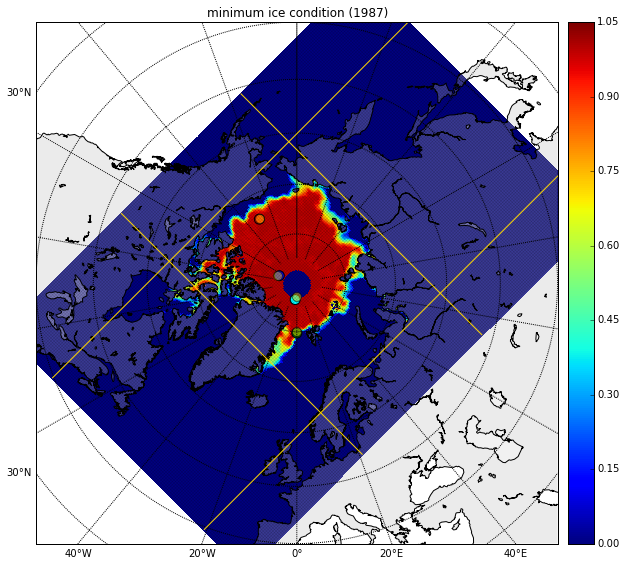

In [109]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)
x,y = m(nasa_lon,nasa_lat)
m.pcolor(x,y,nasa_ice[0,:,:],vmin=0.,vmax=1.05);m.colorbar()
plt.plot(x[::2,::2],y[::2,::2],x[::2,::2].T,y[::2,::2].T,color='k',lw=0.1)

plt.plot(x[150,::2],y[150,::2],color='gold',lw=1)
plt.plot(x[300,::2],y[300,::2],color='gold',lw=1)
plt.plot(x[::2,60],y[::2,60],color='gold',lw=1)
plt.plot(x[::2,250],y[::2,250],color='gold',lw=1)

a=[217,240,265,245]
b=[90,138,185,163]
col=['red','blue','green','cyan']
m.scatter(x[a,b],y[a,b],c=col,s=100)


s_lon,s_lat = m(Susan_lon,Susan_lat)
m.scatter(s_lon,s_lat,c='gold',s=80,alpha=0.5)

plt.title('minimum ice condition (1987)')

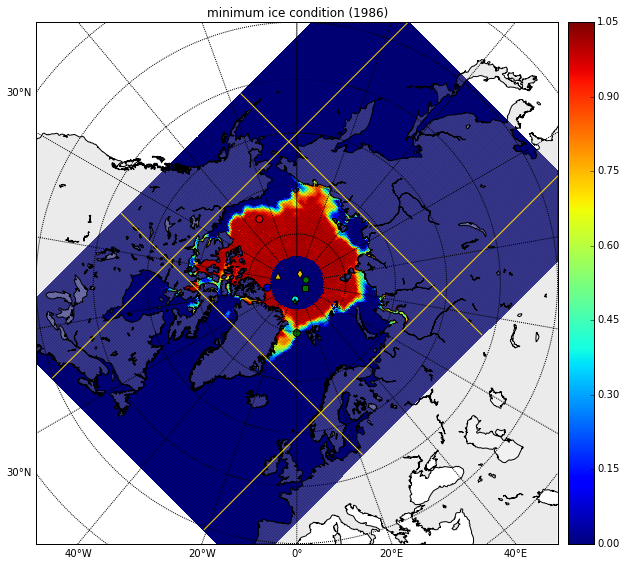

In [179]:
nasa=nc.Dataset('/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198609_v02r00.nc')
nasa_ice=nasa.variables['goddard_merged_seaice_conc_monthly'][:]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)

# Susan's interested location
s_lon,s_lat = m(Susan_lon,Susan_lat)
m.scatter(s_lon,s_lat,c='gold',s=80,alpha=0.5)


#find grid points
x,y = m(nasa_lon,nasa_lat)
m.pcolor(x,y,nasa_ice[0,:,:],vmin=0.,vmax=1.05);m.colorbar()
plt.plot(x[::2,::2],y[::2,::2],x[::2,::2].T,y[::2,::2].T,color='k',lw=0.1)

plt.plot(x[150,::2],y[150,::2],color='gold',lw=1)
plt.plot(x[300,::2],y[300,::2],color='gold',lw=1)
plt.plot(x[::2,60],y[::2,60],color='gold',lw=1)
plt.plot(x[::2,250],y[::2,250],color='gold',lw=1)
    
a=[217,255,265,245]
b=[90,138,185,163]
col=['red','blue','green','cyan']
m.scatter(x[a,b],y[a,b],c=col,s=50)


# station data
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']
i=0
for j in  ([0,5,6,7,8]):
    data=pd.read_csv(nc_filename_[j])
    lon_ = data['long.'];
    lat_ = data['lat.']; 
    y_lon, yy_lat = m(lon_[0], lat_[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40)
    i+=1

plt.title('minimum ice condition (1986)')

In [176]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/NASA_ice/*09_*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_197909_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198009_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198109_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198209_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198309_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198409_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198509_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198609_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198709_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198809_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198909_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_199009_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_199109_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly

Makarov 0.923636
Fram 0.35


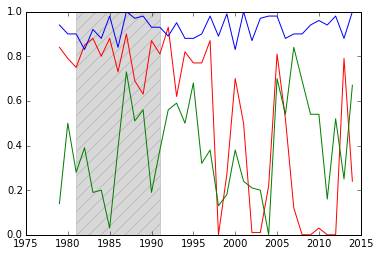

In [184]:
#the GSFC NASA Team algorithm
ice_series=[]
t=[]
a=[217,255,265]#,245]
b=[90,138,185]#,163]
col=['red','blue','green','cyan']


for i in range (len(nc_filename)):
    nasa=nc.Dataset(nc_filename[i])
    nasa_ice=nasa.variables['goddard_nt_seaice_conc_monthly'][0,a,b] 
    t.append(i+1979)
    ice_series.append(nasa_ice)


for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i])
    

plt.axvspan(1981, 1991, hatch="//",alpha=0.3, color='grey')


  
print 'Makarov',np.average(np.array(ice_series)[2:13,1]) #blue
print 'Fram' ,np.average(np.array(ice_series)[2:13,2]) #green

Makarov 0.996364
Fram 0.477273


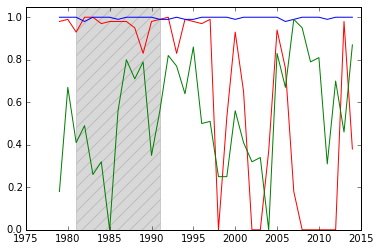

In [188]:
#a merged version of the GSFC NASA Team algorithm and the GSFC Bootstrap sea ice concentrations
ice_series=[]
t=[]
a=[217,255,265]#,245]
b=[90,138,185]#,163]

for i in range (len(nc_filename)):
    nasa=nc.Dataset(nc_filename[i])
    nasa_ice=nasa.variables['goddard_merged_seaice_conc_monthly'][0,a,b] 
    t.append(i+1979)
    ice_series.append(nasa_ice)



for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i])
    

plt.axvspan(1981, 1991, hatch="//",alpha=0.3, color='grey')
plt.ylim(0,1.05)

  
print 'Makarov',np.average(np.array(ice_series)[2:13,1]) #blue
print 'Fram' ,np.average(np.array(ice_series)[2:13,2]) #green

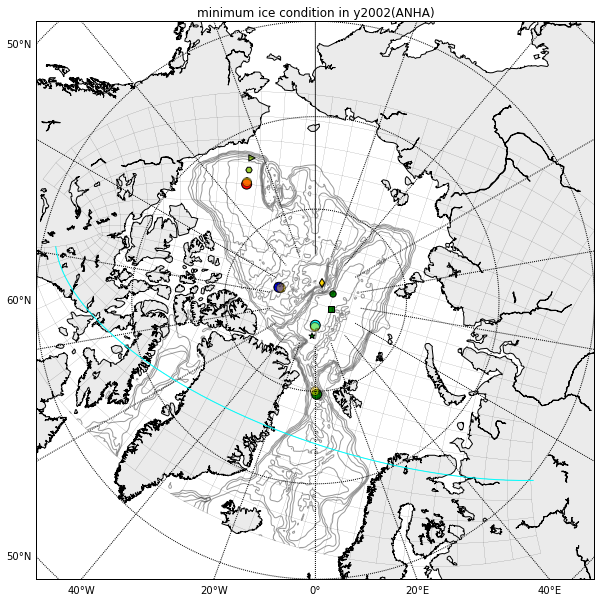

In [101]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)

nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']
i=0
for j in  ([0,5,6,7,8,11,12,13]):
    data=pd.read_csv(nc_filename_[j])
    lon_ = data['long.'];
    lat_ = data['lat.']; 
    y_lon, yy_lat = m(lon_[0], lat_[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40)
    i+=1

x_lon,y_lat = m(lon,lat)
plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
plt.plot(x_lon[80,::2],y_lat[80,::2],color='cyan',lw=1)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)

a=[300,205,119,178]
b=[210,265,335,312]
col=['red','blue','green','cyan']
m.scatter(x_lon[a,b],y_lat[a,b],c=col,s=100)

s_lon,s_lat = m(Susan_lon,Susan_lat)
m.scatter(s_lon,s_lat,c='gold',s=80,alpha=0.5)

plt.title('minimum ice condition in y2002(ANHA)')

In [28]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/ANHA4_ENG_ice/*09.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1983m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1984m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1985m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1986m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1987m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1988m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1989m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1990m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1991m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1992m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1993m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1994m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1995m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1996m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1997m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4

In [29]:
a=[700,605,519,578]
b=[210,265,335,312]
ice_series=[]
t=[]
for i in range (len(nc_filename)):
    anha=nc.Dataset(nc_filename[i])
    anha_ice=anha.variables['ileadfra']
    t.append(i+1983)
    ice_series.append(anha_ice[0,a,b])

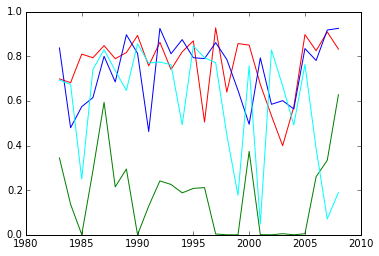

In [30]:
#ANHA
for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i])